<font color="red" size="6">Ensemble methods</font>
<p> <font color="Yellow" size="5"><b>9_Negative Correlation</font>

the concept of Negative Correlation Ensemble (NCE). This technique relies on using base models whose predictions are negatively correlated with each other, which often leads to improved ensemble performance by reducing the overall variance.

<font color="pink" size=4>Steps for Implementing Negative Correlation in Ensemble Learning on Wine Dataset:</font>
<ol>
    <li>Load the Wine dataset.</li>
    <li> Train multiple base models with diverse characteristics (e.g., Decision Trees, K-Nearest Neighbors, etc.).</li>
    <li> Calculate the correlation between the predictions of the models.</li>
    <li> Combine base models into an ensemble using a method that emphasizes negative correlation (e.g., by selecting models whose predictions are negatively correlated with each other).</li>
    <li> Evaluate the ensemble performance.</li></ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
# 1. Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# 2. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define base models
model_1 = DecisionTreeClassifier(random_state=42)
model_2 = KNeighborsClassifier()
model_3 = LogisticRegression(max_iter=1000)

# 4. Train the base models
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# 5. Get predictions from each base model on the test set
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

C:\Users\root\anaconda3\envs\mydl\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
# 6. Compute correlation between the predictions of the models
corr_12 = np.corrcoef(pred_1, pred_2)[0, 1]
corr_13 = np.corrcoef(pred_1, pred_3)[0, 1]
corr_23 = np.corrcoef(pred_2, pred_3)[0, 1]

In [4]:
print(f"Correlation between Model 1 and Model 2: {corr_12:.2f}")
print(f"Correlation between Model 1 and Model 3: {corr_13:.2f}")
print(f"Correlation between Model 2 and Model 3: {corr_23:.2f}")

Correlation between Model 1 and Model 2: 0.43
Correlation between Model 1 and Model 3: 0.90
Correlation between Model 2 and Model 3: 0.54


In [5]:
# 7. Create a voting ensemble to combine the base models (voting can help to mitigate correlation effects)
ensemble = VotingClassifier(estimators=[('dt', model_1), ('knn', model_2), ('lr', model_3)], voting='hard')


In [6]:
# 8. Train the ensemble model
ensemble.fit(X_train, y_train)

# 9. Make predictions with the ensemble
ensemble_pred = ensemble.predict(X_test)

# 10. Evaluate performance
accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.9722


C:\Users\root\anaconda3\envs\mydl\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


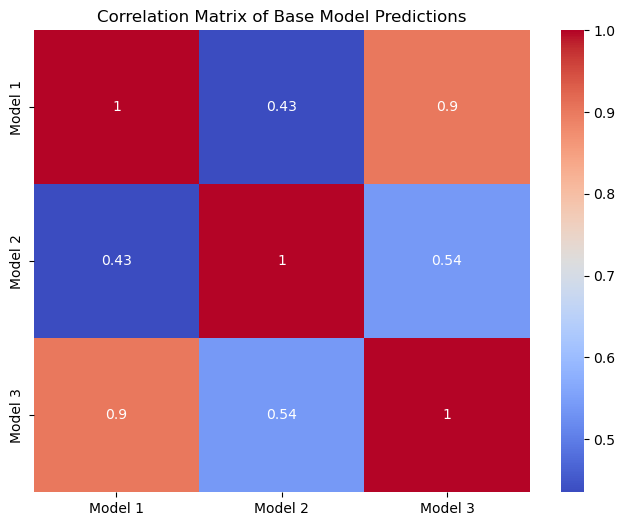

In [7]:
# 11. Visualizing Correlation Matrix of Predictions
predictions = np.array([pred_1, pred_2, pred_3])
corr_matrix = np.corrcoef(predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['Model 1', 'Model 2', 'Model 3'], yticklabels=['Model 1', 'Model 2', 'Model 3'])
plt.title("Correlation Matrix of Base Model Predictions")
plt.show()